# Exploratory Data Analysis for an Online Retail Data

## Step 1: Importing necessary Libraries

In [1]:
# import pytho modules for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Step 2: Loading the Dataset.
* We use the [online_retail_data_without_null_values.csv](https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Python-Modules-for-Data-Analysis/Pandas-Module/How-to-Handle-Missing-Data-in-Pandas-DataFrame/online_retail_data_without_null_values.csv) dataset which was generated after removing raws with Null values from [Online Retail Store](https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Datasets/Online_Retail.csv) dataset.

In [2]:
url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Python-Modules-for-Data-Analysis/Pandas-Module/How-to-Filter-Pandas-DataFrame/online_retail_data_without_negative_qty_values.csv"
online_retail_data = pd.read_csv(url, encoding= 'unicode_escape', parse_dates=['InvoiceDate'])

# check shape of the data
online_retail_data.shape

(397924, 8)

## Step 3: Viewing the dataset.

Previewing the Dataset

In [3]:
online_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Step 4: Generate Additional Columns/Features from the Data
* Add some extra columns from the preview above.
  
  1. Add __TotalAmount = Quantity * UnitPrice__
  2. Add __Date__ extracted from __InvoiceDate__ datetime column
  3. Add __MonthYear__ extracted from __InvoiceDate__ datetime column

In [4]:
# add TotalAmount Column
online_retail_data['TotalAmount'] = online_retail_data['Quantity'] * online_retail_data['UnitPrice']

# add Date Column
online_retail_data['Date'] = online_retail_data['InvoiceDate'].dt.date

# add MonthYear Column
online_retail_data['MonthYear'] = online_retail_data['InvoiceDate'].dt.to_period('M')

# add Week Start's Date - week starts on Monday
online_retail_data['Week'] = online_retail_data['InvoiceDate'].dt.to_period('W').dt.start_time

In [5]:
online_retail_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date,MonthYear,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12,2010-11-29
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,2010-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12,2010-11-29


### Step 5: Validate Column Data Types
1. Check for the data type of each column
2. Convert specific column to appropriate data type

#### Step 5: Method 1
* Use __dataframe.info()__ function to check for datatype

In [6]:
# Basic Information about the data
online_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalAmount  397924 non-null  float64       
 9   Date         397924 non-null  object        
 10  MonthYear    397924 non-null  period[M]     
 11  Week         397924 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(4), period[M](1)
memory usage: 36.4+ MB


#### Step 5: Method 2
* Check the columns Data Types using the __dataframe.dtypes__ method.

In [7]:
online_retail_data.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
Date                   object
MonthYear           period[M]
Week           datetime64[ns]
dtype: object

* From the above two approaches, we see that __InvoiceNo__ and __CustomerID__ are of wrong data type. i.e., should be __object__.

In [8]:
## using dictionary to convert specific columns
convert_dic = {
    'CustomerID': str,
    'InvoiceNo': str
    
}
online_retail_data = online_retail_data.astype(convert_dic)
# preview
online_retail_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
TotalAmount           float64
Date                   object
MonthYear           period[M]
Week           datetime64[ns]
dtype: object

### Step 6: Getting Descriptive Statistics.

In [9]:
# Describe the data - descriptive statistics
online_retail_data.describe(include='all', datetime_is_numeric=True)
# Specifying datetime_is_numeric=True adopts the future behavior of Treating datetime data as categorical rather than numeric in `.describe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date,MonthYear,Week
count,397924,397924,397924,397924.000000,397924,397924.000000,397924,397924,397924.000000,397924,397924,397924
unique,18536,3665,3877,NaN,NaN,NaN,4339,37,NaN,305,13,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841.0,United Kingdom,NaN,2011-11-06,2011-11,NaN
freq,542,2035,2028,NaN,NaN,NaN,7847,354345,NaN,3423,64545,NaN
mean,NaN,NaN,NaN,13.021823,2011-07-10 23:43:36.912475648,3.116174,NaN,NaN,22.394749,NaN,NaN,2011-07-07 19:44:33.230064384
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,NaN,NaN,0.000000,NaN,NaN,2010-11-29 00:00:00
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,NaN,NaN,4.680000,NaN,NaN,2011-04-04 00:00:00
50%,NaN,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,NaN,NaN,11.800000,NaN,NaN,2011-07-25 00:00:00
75%,NaN,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,NaN,NaN,19.800000,NaN,NaN,2011-10-17 00:00:00
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,NaN,NaN,168469.600000,NaN,NaN,2011-12-05 00:00:00


### Quick Insights
1. There are 397,924 Item Level transactions in the dataset
2. 4,339 Unique Customers Invoiced.
3. 37 Countries
4. Mean Sales Value = $22

### Step 7: Checking Duplicates
* The pandas.DataFrame.duplicated.sum() function returns a Series or DataFrame containing the sum of the boolean values (True or False) in the duplicate rows of the DataFrame.

In [10]:
online_retail_data.duplicated().sum()

5192

### Step 8: Grouping the DataFrame & Visualization
* We group the dataframe and generate the following visuals:
  * Boxplot to show any outliers for the numerical values

#### Step 8.1. Grouping Data 1: Group By CustomerID By Day
* We use the output of this GropuBy to calculate:
  * Monthly Cohort Retention
  * Weekly Cohort Retention
  * RFM Analysis, and
  * Customer Segmentation using K-Means Clustering

In [11]:
# group the data using CustomerID, Date and Country
grouped_daily_customer_df = online_retail_data.groupby(
    ['CustomerID', 'Date', 'Country', 'MonthYear', 'Week']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

# explicitly convert CustomerID to object
grouped_daily_customer_df['CustomerID'] = grouped_daily_customer_df['CustomerID'].astype(str)

# save results in a csv file
grouped_daily_customer_df.to_csv("grouped_daily_customer_data.csv", date_format='%Y-%m-%d', index=False)

# preview
grouped_daily_customer_df.head()

,CustomerID,Date,Country,MonthYear,Week,TotalAmount,CountOfUniqueInvoices
0,12346.0,2011-01-18,United Kingdom,2011-01,2011-01-17,77183.60,1
1,12347.0,2010-12-07,Iceland,2010-12,2010-12-06,711.79,1
2,12347.0,2011-01-26,Iceland,2011-01,2011-01-24,475.39,1
3,12347.0,2011-04-07,Iceland,2011-04,2011-04-04,636.25,1
4,12347.0,2011-06-09,Iceland,2011-06,2011-06-06,382.52,1


* From the above result of groupby, we can easily check for outliers from TotalAmount column.

<Axes: >

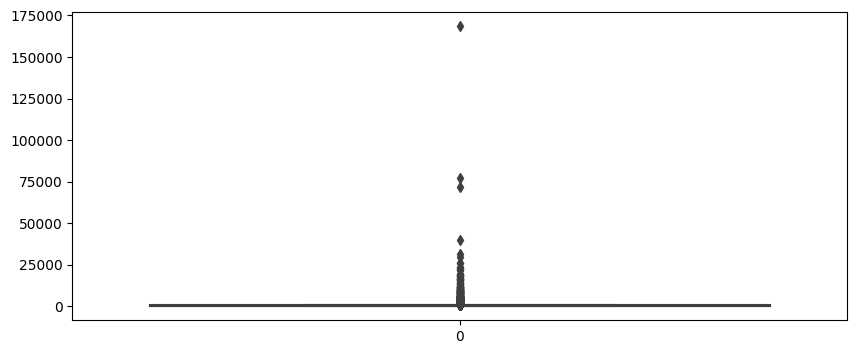

In [12]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(grouped_daily_customer_df['TotalAmount'])

#### Step 8.2. Grouping Data 2: Group Data By Country
* With the following __Objectives__:
  * Calculate __Average Sales Value__ by Country.
  * Generate __Revenue Contribution__ by Country

In [13]:
# group the data by country and understand the summary data by Country
grouped_country_df = online_retail_data.groupby( 'Country').agg(
    CountOfUniqueCustomers = pd.NamedAgg(column = 'CustomerID', aggfunc = 'nunique'),
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

# calculate the Average Basket Value 
grouped_country_df['AverageSalesValue'] = grouped_country_df['TotalAmount'] / grouped_country_df['CountOfUniqueCustomers']
# calculate the Revenue Contribution By Country
TotalAmount = grouped_country_df['TotalAmount'].sum()
grouped_country_df['Contribution'] = grouped_country_df['TotalAmount'] / TotalAmount

# save the output in a csv file
grouped_country_df.to_csv("grouped_country_data.csv", index=False)

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue,Contribution
0,Australia,9,138521.31,57,15391.256667,0.015544
1,Austria,11,10198.68,17,927.152727,0.001144
2,Bahrain,2,548.40,2,274.200000,0.000062
3,Belgium,25,41196.34,98,1647.853600,0.004623
4,Brazil,1,1143.60,1,1143.600000,0.000128


In [14]:
# preview
grouped_country_df.head()

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue,Contribution
0,Australia,9,138521.31,57,15391.256667,0.015544
1,Austria,11,10198.68,17,927.152727,0.001144
2,Bahrain,2,548.40,2,274.200000,0.000062
3,Belgium,25,41196.34,98,1647.853600,0.004623
4,Brazil,1,1143.60,1,1143.600000,0.000128


#### Formatting

In [20]:
grouped_country_df.style.format(
    {
        'Contribution': '{:.2%}'
    }
)

grouped_country_df.head()

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue,Contribution
0,Australia,9,138521.31,57,15391.256667,0.015544
1,Austria,11,10198.68,17,927.152727,0.001144
2,Bahrain,2,548.40,2,274.200000,0.000062
3,Belgium,25,41196.34,98,1647.853600,0.004623
4,Brazil,1,1143.60,1,1143.600000,0.000128


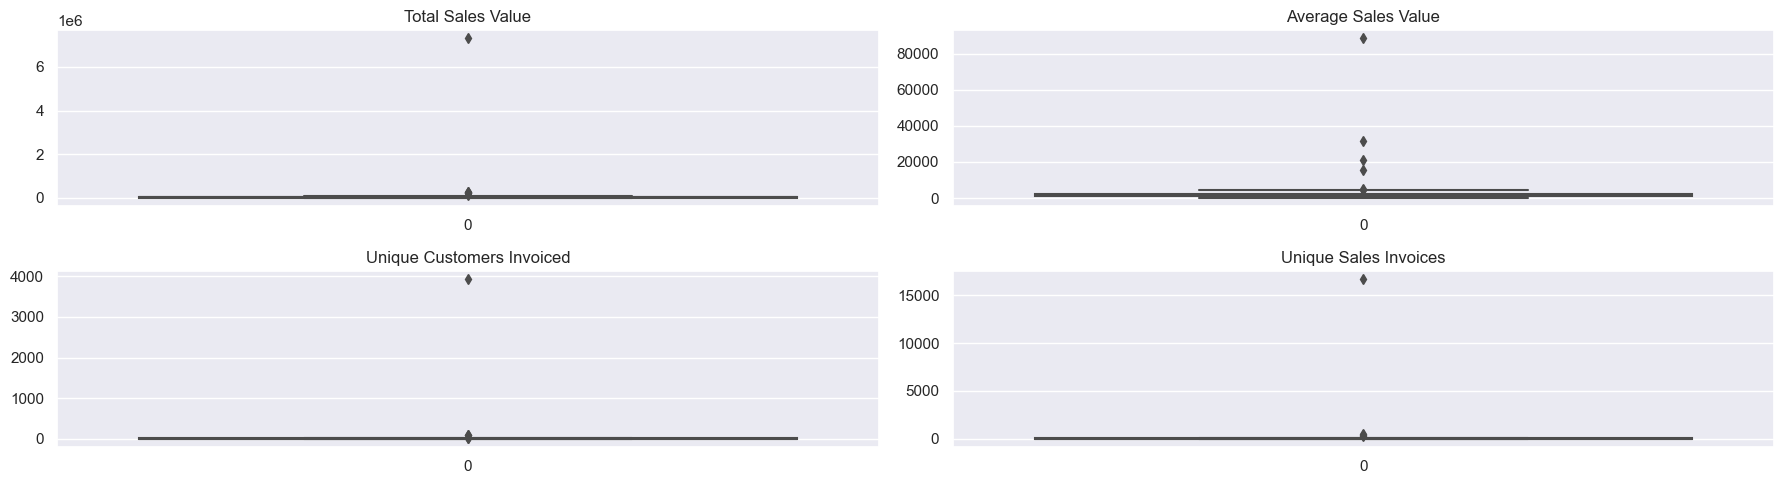

In [21]:
#set seaborn plotting aesthetics as default
sns.set()
# Define the Subplots
fig, ax = plt.subplots(2,2, figsize = (18, 5))

# Total Amount
sns.boxplot(grouped_country_df['TotalAmount'], ax = ax[0, 0]).set(title="Total Sales Value")
# Average Sales Value
sns.boxplot(grouped_country_df['AverageSalesValue'], ax = ax[0,1]).set(title="Average Sales Value")
# Unique Customers
sns.boxplot(grouped_country_df['CountOfUniqueCustomers'], ax = ax[1, 0]).set(title="Unique Customers Invoiced")
# Unique Invoices
sns.boxplot(grouped_country_df['CountOfUniqueInvoices'], ax = ax[1,1]).set(title="Unique Sales Invoices")

plt.tight_layout()

#### Bivariate Analysis
1. Check for liner relationships between the 2 variables.

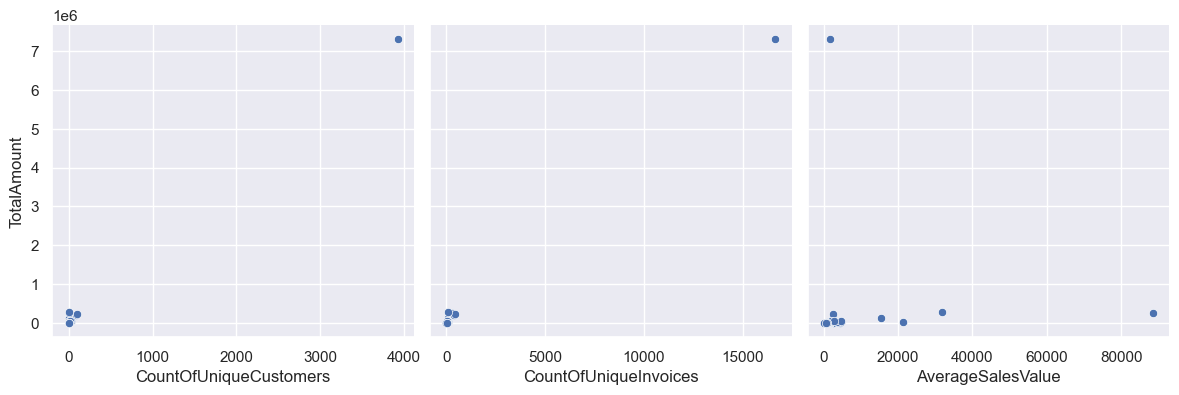

In [22]:
data = grouped_country_df.set_index('Country')

sns.pairplot(data, 
             x_vars=['CountOfUniqueCustomers', 'CountOfUniqueInvoices', 'AverageSalesValue'],
             y_vars=['TotalAmount'],
             height=4,
             aspect=1,
             kind='scatter'
             )

#### Multivariate Analysis:
1. Check for any correlations between the four variables.

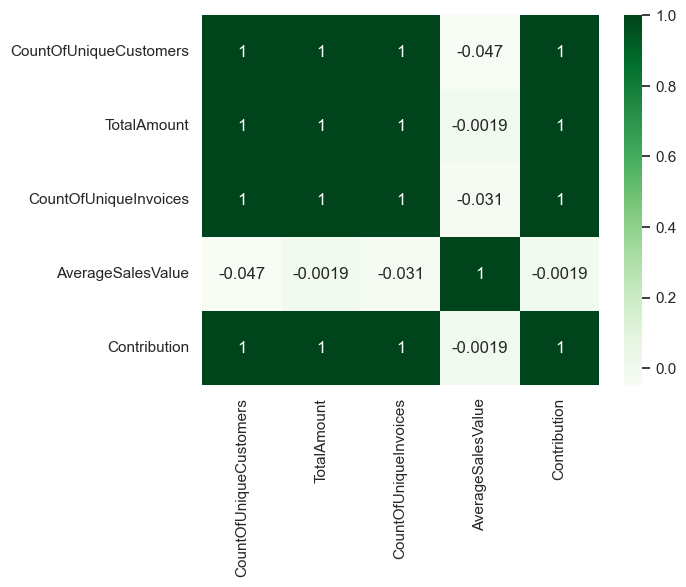

In [23]:
# check fo correlations
data = grouped_country_df.set_index('Country')

sns.heatmap(data.corr(), cmap='Greens', annot=True)
plt.show()

### Grouping Data 3: Group Data By Country By Day

In [24]:
# group the data By Country, By Date
grouped_daily_country_df = online_retail_data.groupby(
    ['Date','Week', 'Country', 'MonthYear']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique'),
    CountOfUniqueCustomers = pd.NamedAgg(column='CustomerID', aggfunc='nunique')
).reset_index()

# save results in a csv file
grouped_daily_country_df.to_csv("grouped_daily_country_df.csv", date_format='%Y-%m-%d', index=False)

# preview
grouped_daily_country_df.head()

,Date,Week,Country,MonthYear,TotalAmount,CountOfUniqueInvoices,CountOfUniqueCustomers
0,2010-12-01,2010-11-29,Australia,2010-12,358.25,1,1
1,2010-12-01,2010-11-29,EIRE,2010-12,555.38,2,1
2,2010-12-01,2010-11-29,France,2010-12,855.86,1,1
3,2010-12-01,2010-11-29,Germany,2010-12,261.48,1,1
4,2010-12-01,2010-11-29,Netherlands,2010-12,192.60,1,1
